In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

plt.style.use("seaborn-poster")

In [3]:

n = 20000
Days_list = (-3,-2,-1,0,1,2)
path = "./results/"+str(n)+"allpc_" #"./results/pc_"
df = pd.DataFrame()


for file in glob.glob(path+"*DL*.csv"):
    temp = pd.read_csv(file)
    #temp['pc'] = pc
    #temp['DAYS'] = days
    df = df.append(temp)
df.pc = ["$%s$" % x for x in df.pc]
df.head()

,DAYS,actual_gen_times_25,actual_gen_times_75,actual_gen_times_mean,cases,pc,prop_cases_prevented_25,prop_cases_prevented_75,prop_cases_prevented_mean,sim
0,0.0,0.97804,3.698938,2.584128,4737,$1.0$,0.0,0.0,0.092579,0
1,0.0,0.97804,3.698938,2.584128,18,$1.0$,0.0,0.0,0.092579,1
2,0.0,0.97804,3.698938,2.584128,71,$1.0$,0.0,0.0,0.092579,2
3,0.0,0.97804,3.698938,2.584128,12367,$1.0$,0.0,0.0,0.092579,3
4,0.0,0.97804,3.698938,2.584128,2714,$1.0$,0.0,0.0,0.092579,4


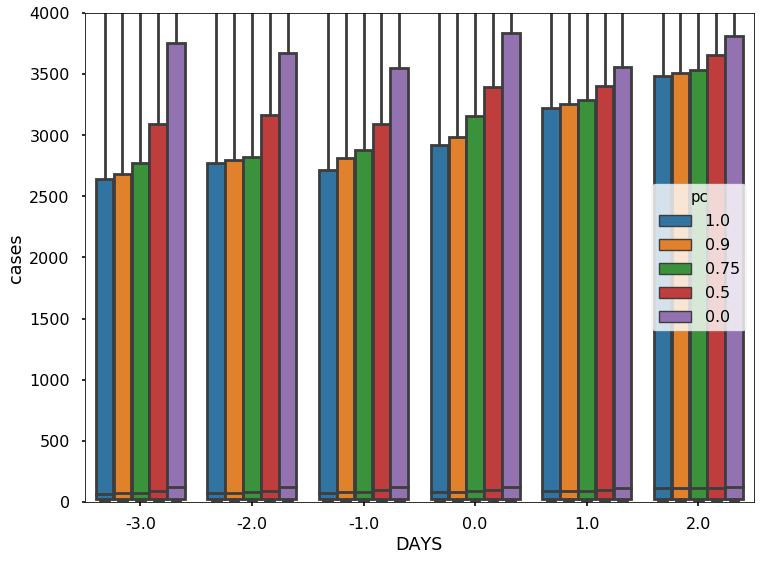

In [16]:
import seaborn as sns

#zoomed out 
fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((0,4000))
plt.show()

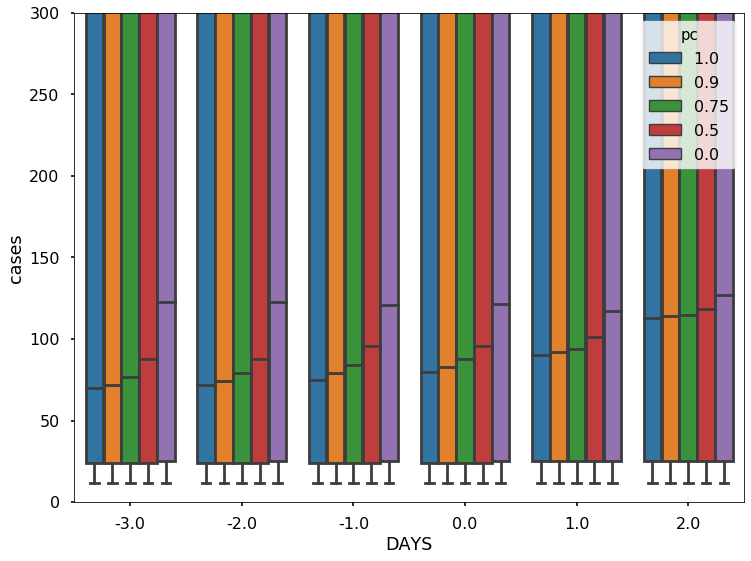

In [13]:

#zoomed in

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((0,300))
plt.show()

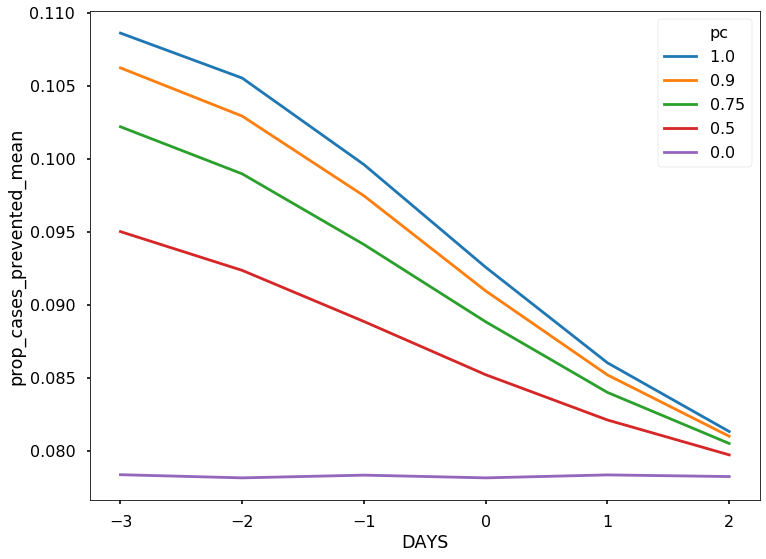

In [11]:
fig,ax = plt.subplots(figsize=(12,9))

lines =sns.lineplot(
    x="DAYS",
    y="prop_cases_prevented_mean",
    hue="pc",
    data =df,
    ax=ax
    )

#for pc in ["$0.5$","$0.75$","$0.9$",'$1.0$']:
#    ax.fill_between(np.repeat(Days_list,20000), 
#                    df.loc[df.pc==pc, "prop_cases_prevented_25"],
#                    df.loc[df.pc==pc, "prop_cases_prevented_75"],
#                   alpha=0.2
#                   )

#ax.set_ylim((0,0.2))
plt.legend()

plt.show()

In [36]:
def toy(child,parent_detected, DAYS=-2, parent_sot = 5, parent_at = 8):
    from random import random
    if parent_detected:
        print("parent detected")
        if child < parent_sot + DAYS:
            print("Too early, not traced")
        elif child < parent_at:
            if random()< 0.5:
                print("Traced")
            else:
                print("Not traced")
    else:
        print("parent undetected")


In [47]:
toy(3, False)

parent undetected
